In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns

In [58]:
df = pd.read_csv('weather2.csv')
df = df.drop(['Unnamed: 0'], axis = 1)
df.head()

,Date,Team 1,Team 2,Team 1 Score,Team 2 Score,Venue,Weather (Degrees),Weather Type,Wind (MPH),Wind Direction
0,2014-03-22,ARI,LAD,1,3,Sydney Cricket Ground,75,Overcast,5,Varies
1,2014-03-22,ARI,LAD,5,7,Sydney Cricket Ground,79,Partly Cloudy,5,Varies
2,2014-03-30,LAD,SD,1,3,Petco Park,67,Clear,11,L To R
3,2014-03-31,CHC,PIT,0,1,PNC Park,54,Sunny,2,Out To CF
4,2014-03-31,KAN,DET,3,4,Comerica Park,52,Sunny,4,In From CF


In [21]:
df2 = pd.read_csv('logs.csv')
df2.head()

,Player,Date,Tm,Opp,PA,AB,R,H,X2B,X3B,HR,RBI,BB,SO,WPA,RE24,aLI,BOP,Pos.Summary
0,A.J. Ellis\ellisaj01,2014-03-22 00:00:00,LAD,ARI,4,2,0,0,0,0,0,0,1,1,-0.024,0.061,0.620,8,C
1,Miguel Montero\montemi01,2014-03-22 00:00:00,ARI,LAD,4,4,0,1,0,0,0,0,0,0,-0.052,-0.334,0.743,6,C
2,A.J. Ellis\ellisaj01,2014-03-23 00:00:00,LAD,ARI,5,4,1,0,0,0,0,0,1,1,-0.034,-0.131,0.504,6,C
3,Miguel Montero\montemi01,2014-03-23 00:00:00,ARI,LAD,5,5,0,1,0,0,0,0,0,1,0.004,-0.073,0.602,5,C
4,A.J. Ellis\ellisaj01,2014-03-30 00:00:00,LAD,SDP,4,3,0,2,0,0,0,0,1,0,0.100,0.852,0.742,7,C


In [22]:
for i in range(len(df2)):
    df2.at[i, 'Date'] = df2.at[i, 'Date'].replace(' 00:00:00', '')
    if df2.at[i, 'H'] >= 1:
        df2.at[i, 'H'] = 1
df2.head()

,Player,Date,Tm,Opp,PA,AB,R,H,X2B,X3B,HR,RBI,BB,SO,WPA,RE24,aLI,BOP,Pos.Summary
0,A.J. Ellis\ellisaj01,2014-03-22,LAD,ARI,4,2,0,0,0,0,0,0,1,1,-0.024,0.061,0.620,8,C
1,Miguel Montero\montemi01,2014-03-22,ARI,LAD,4,4,0,1,0,0,0,0,0,0,-0.052,-0.334,0.743,6,C
2,A.J. Ellis\ellisaj01,2014-03-23,LAD,ARI,5,4,1,0,0,0,0,0,1,1,-0.034,-0.131,0.504,6,C
3,Miguel Montero\montemi01,2014-03-23,ARI,LAD,5,5,0,1,0,0,0,0,0,1,0.004,-0.073,0.602,5,C
4,A.J. Ellis\ellisaj01,2014-03-30,LAD,SDP,4,3,0,1,0,0,0,0,1,0,0.100,0.852,0.742,7,C


In [23]:
merge = pd.merge(df2, df,  how= 'inner', left_on=['Date','Tm', 'Opp'], right_on = ['Date','Team 1', 'Team 2'])
merge2 = pd.merge(df2, df,  how= 'inner', left_on=['Date','Tm', 'Opp'], right_on = ['Date','Team 2', 'Team 1'])
merge = merge.append(merge2)
merge = merge.drop_duplicates(['Player', 'Date'], keep= False)
merge = merge.reset_index()
merge = merge.drop(['index'], 1)
merge.head()

,Player,Date,Tm,Opp,PA,AB,R,H,X2B,X3B,...,Unnamed: 0,Team 1,Team 2,Team 1 Score,Team 2 Score,Venue,Weather (Degrees),Weather Type,Wind (MPH),Wind Direction
0,J.P. Arencibia\arencjp01,2014-03-31,TEX,PHI,5,4,2,1,1,0,...,6,TEX,PHI,10,14,Globe Life Field,74,Partly Cloudy,18,R To L
1,Evan Gattis\gattiev01,2014-03-31,ATL,MIL,4,4,0,0,0,0,...,7,ATL,MIL,0,2,Miller Park,67,Roof Closed,0,None
2,Chris Iannetta\iannech01,2014-03-31,LAA,SEA,4,4,0,0,0,0,...,15,LAA,SEA,3,10,Angel Stadium,60,Partly Cloudy,9,Out To CF
3,John Jaso\jasojo01,2014-03-31,OAK,CLE,4,3,0,1,1,0,...,14,OAK,CLE,0,2,RingCentral Coliseum,49,Cloudy,12,Out To RF
4,Brayan Pena\penabr01,2014-03-31,CIN,STL,4,3,0,0,0,0,...,10,CIN,STL,0,1,Great American Ball Park,64,Partly Cloudy,9,In From CF


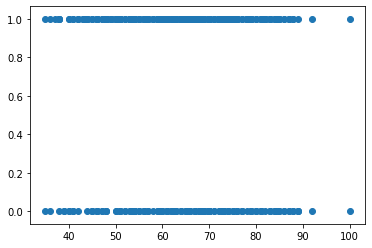

In [24]:
plt.scatter(x = merge['Weather (Degrees)'], y = merge['H'])
plt.show()

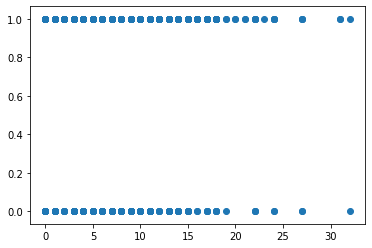

In [25]:
plt.scatter(x = merge['Wind (MPH)'], y = merge['H'])
plt.show()

In [26]:
x = merge['Weather (Degrees)']
y = merge['H']
model = sm.Logit(y, sm.add_constant(x)).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.626335
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      H   No. Observations:                  571
Model:                          Logit   Df Residuals:                      569
Method:                           MLE   Df Model:                            1
Date:                Sun, 28 Jun 2020   Pseudo R-squ.:                0.001441
Time:                        13:21:24   Log-Likelihood:                -357.64
converged:                       True   LL-Null:                       -358.15
Covariance Type:            nonrobust   LLR p-value:                    0.3096
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 1.2361      0.488      2.535      0.011       0.280       2.192
Weather (Degrees)    -0.0075      0.007     -1.014      0.311      -0.022       0.007
=====================================================================================
"""

In [27]:
x = merge['Wind (MPH)']
y = merge['H']
model = sm.Logit(y, sm.add_constant(x)).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.626899
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      H   No. Observations:                  571
Model:                          Logit   Df Residuals:                      569
Method:                           MLE   Df Model:                            1
Date:                Sun, 28 Jun 2020   Pseudo R-squ.:               0.0005418
Time:                        13:21:25   Log-Likelihood:                -357.96
converged:                       True   LL-Null:                       -358.15
Covariance Type:            nonrobust   LLR p-value:                    0.5333
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6759      0.150      4.492      0.000       0.381       0.971
Wind (MPH)     0.0089      0.014      0.621      0.534      -0.019       0.037
==============================================================================
"""

In [28]:
x = merge[['Weather (Degrees)', 'Wind (MPH)']]
y = merge['H']
model = sm.Logit(y, sm.add_constant(x)).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.626078
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      H   No. Observations:                  571
Model:                          Logit   Df Residuals:                      568
Method:                           MLE   Df Model:                            2
Date:                Sun, 28 Jun 2020   Pseudo R-squ.:                0.001849
Time:                        13:21:26   Log-Likelihood:                -357.49
converged:                       True   LL-Null:                       -358.15
Covariance Type:            nonrobust   LLR p-value:                    0.5156
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 1.1495      0.514      2.238      0.025       0.143       2.156
Weather (Degrees)    -0.0071      0.007     -0.966      0.334      -0.022       0.007
Wind (MPH)            0.0077      0.014      0.540      0.589      -0.020       0.036
=====================================================================================
"""

In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

x, y = pd.DataFrame(merge, columns = ['Weather (Degrees)']), pd.DataFrame(merge, columns = ['H'])
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20)

clf = RandomForestClassifier()
clf.fit(x_train, y_train.values.ravel())

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [33]:
predictions = clf.predict(x_test)
predictions = [float(i) for i in predictions]
comparison = pd.DataFrame({"Real" : y_test.iloc[:,0], "Predictions" : predictions})
comparison = comparison.reset_index()
comparison = comparison.drop(['index'], axis=1)
correct = 0
for i in range(len(comparison)):
    if comparison.at[i, 'Real'] == comparison.at[i, 'Predictions']:
        correct += 1
print (correct / len(comparison))

0.6


In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

x, y = pd.DataFrame(merge, columns = ['Wind (MPH)']), pd.DataFrame(merge, columns = ['H'])
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20)

clf = RandomForestClassifier()
clf.fit(x_train, y_train.values.ravel())

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [35]:
predictions = clf.predict(x_test)
predictions = [float(i) for i in predictions]
comparison = pd.DataFrame({"Real" : y_test.iloc[:,0], "Predictions" : predictions})
comparison = comparison.reset_index()
comparison = comparison.drop(['index'], axis=1)
correct = 0
for i in range(len(comparison)):
    if comparison.at[i, 'Real'] == comparison.at[i, 'Predictions']:
        correct += 1
print (correct / len(comparison))

0.6521739130434783


In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

x, y = pd.DataFrame(merge, columns = ['Weather (Degrees)', 'Wind (MPH)']), pd.DataFrame(merge, columns = ['H'])
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20)

clf = RandomForestClassifier()
clf.fit(x_train, y_train.values.ravel())

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [37]:
predictions = clf.predict(x_test)
predictions = [float(i) for i in predictions]
comparison = pd.DataFrame({"Real" : y_test.iloc[:,0], "Predictions" : predictions})
comparison = comparison.reset_index()
comparison = comparison.drop(['index'], axis=1)
correct = 0
for i in range(len(comparison)):
    if comparison.at[i, 'Real'] == comparison.at[i, 'Predictions']:
        correct += 1
print (correct / len(comparison))

0.591304347826087


In [38]:
merge2 = pd.get_dummies(merge['Weather Type'], prefix = 'Weather')
merge2.head()

,Weather_Clear,Weather_Cloudy,Weather_Drizzle,Weather_Overcast,Weather_Partly Cloudy,Weather_Rain,Weather_Roof Closed,Weather_Sunny
0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,1,0
2,0,0,0,0,1,0,0,0
3,0,1,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0


In [39]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

x, y = pd.DataFrame(merge2), pd.DataFrame(merge, columns = ['H'])
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20)

clf = RandomForestClassifier()
clf.fit(x_train, y_train.values.ravel())

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [41]:
predictions = clf.predict(x_test)
predictions = [float(i) for i in predictions]
comparison = pd.DataFrame({"Real" : y_test.iloc[:,0], "Predictions" : predictions})
comparison = comparison.reset_index()
comparison = comparison.drop(['index'], axis=1)
correct = 0
for i in range(len(comparison)):
    if comparison.at[i, 'Real'] == comparison.at[i, 'Predictions']:
        correct += 1
print (correct / len(comparison))

0.6434782608695652


In [42]:
merge3 = pd.get_dummies(merge['Wind Direction'], prefix = 'Wind')
merge3.head()

,Wind_In From CF,Wind_In From LF,Wind_In From RF,Wind_L To R,Wind_None,Wind_Out To CF,Wind_Out To LF,Wind_Out To RF,Wind_R To L,Wind_Varies
0,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0
4,1,0,0,0,0,0,0,0,0,0


In [43]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

x, y = pd.DataFrame(merge3), pd.DataFrame(merge, columns = ['H'])
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20)

clf = RandomForestClassifier()
clf.fit(x_train, y_train.values.ravel())

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [44]:
predictions = clf.predict(x_test)
predictions = [float(i) for i in predictions]
comparison = pd.DataFrame({"Real" : y_test.iloc[:,0], "Predictions" : predictions})
comparison = comparison.reset_index()
comparison = comparison.drop(['index'], axis=1)
correct = 0
for i in range(len(comparison)):
    if comparison.at[i, 'Real'] == comparison.at[i, 'Predictions']:
        correct += 1
print (correct / len(comparison))

0.6434782608695652


In [45]:
test = merge[merge['Player'] == 'Jonathan Lucroy\lucrojo01']
test = test.reset_index()
test = test.drop(['index'], axis = 1)
test.head()

,Player,Date,Tm,Opp,PA,AB,R,H,X2B,X3B,...,Unnamed: 0,Team 1,Team 2,Team 1 Score,Team 2 Score,Venue,Weather (Degrees),Weather Type,Wind (MPH),Wind Direction
0,Jonathan Lucroy\lucrojo01,2014-04-01,MIL,ATL,4,4,0,1,0,0,...,21,MIL,ATL,2,5,Miller Park,65,Roof Closed,0,None
1,Jonathan Lucroy\lucrojo01,2014-04-14,MIL,STL,4,4,0,0,0,0,...,190,MIL,STL,0,4,Miller Park,62,Roof Closed,0,None
2,Jonathan Lucroy\lucrojo01,2014-04-15,MIL,STL,4,3,0,0,0,0,...,200,MIL,STL,1,6,Miller Park,62,Roof Closed,0,None
3,Jonathan Lucroy\lucrojo01,2014-04-17,MIL,PIT,4,3,0,1,0,0,...,227,MIL,PIT,2,11,PNC Park,62,Clear,8,L To R
4,Jonathan Lucroy\lucrojo01,2014-04-27,MIL,CHC,4,3,0,0,0,0,...,339,MIL,CHC,0,4,Miller Park,70,Roof Closed,0,None


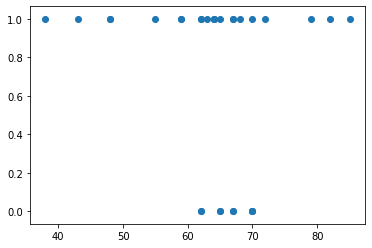

In [46]:
plt.scatter(x = test['Weather (Degrees)'], y = test['H'])
plt.show()

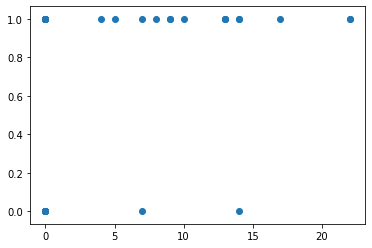

In [47]:
plt.scatter(x = test['Wind (MPH)'], y = test['H'])
plt.show()

In [48]:
x = test['Weather (Degrees)']
y = test['H']
model = sm.Logit(y, sm.add_constant(x)).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.588682
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      H   No. Observations:                   31
Model:                          Logit   Df Residuals:                       29
Method:                           MLE   Df Model:                            1
Date:                Sun, 28 Jun 2020   Pseudo R-squ.:                 0.02284
Time:                        13:22:07   Log-Likelihood:                -18.249
converged:                       True   LL-Null:                       -18.676
Covariance Type:            nonrobust   LLR p-value:                    0.3557
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 3.4153      2.898      1.179      0.239      -2.264       9.095
Weather (Degrees)    -0.0390      0.044     -0.889      0.374      -0.125       0.047
=====================================================================================
"""

In [49]:
x = test['Wind (MPH)']
y = test['H']
model = sm.Logit(y, sm.add_constant(x)).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.516652
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      H   No. Observations:                   31
Model:                          Logit   Df Residuals:                       29
Method:                           MLE   Df Model:                            1
Date:                Sun, 28 Jun 2020   Pseudo R-squ.:                  0.1424
Time:                        13:22:07   Log-Likelihood:                -16.016
converged:                       True   LL-Null:                       -18.676
Covariance Type:            nonrobust   LLR p-value:                   0.02110
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1031      0.513      0.201      0.841      -0.903       1.110
Wind (MPH)     0.1648      0.085      1.931      0.053      -0.002       0.332
==============================================================================
"""

In [50]:
x = test[['Weather (Degrees)', 'Wind (MPH)']]
y = test['H']
model = sm.Logit(y, sm.add_constant(x)).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.507087
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      H   No. Observations:                   31
Model:                          Logit   Df Residuals:                       28
Method:                           MLE   Df Model:                            2
Date:                Sun, 28 Jun 2020   Pseudo R-squ.:                  0.1583
Time:                        13:22:09   Log-Likelihood:                -15.720
converged:                       True   LL-Null:                       -18.676
Covariance Type:            nonrobust   LLR p-value:                   0.05203
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 2.7342      3.595      0.760      0.447      -4.313       9.781
Weather (Degrees)    -0.0402      0.054     -0.742      0.458      -0.146       0.066
Wind (MPH)            0.1609      0.084      1.911      0.056      -0.004       0.326
=====================================================================================
"""

In [51]:
merge4 = pd.get_dummies(test['Weather Type'], prefix = 'Wind')
merge4.head()

,Wind_Clear,Wind_Cloudy,Wind_Drizzle,Wind_Overcast,Wind_Partly Cloudy,Wind_Roof Closed,Wind_Sunny
0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0
2,0,0,0,0,0,1,0
3,1,0,0,0,0,0,0
4,0,0,0,0,0,1,0


In [52]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

x, y = pd.DataFrame(merge4), pd.DataFrame(test, columns = ['H'])
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20)

clf = RandomForestClassifier()
clf.fit(x_train, y_train.values.ravel())

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [53]:
predictions = clf.predict(x_test)
predictions = [float(i) for i in predictions]
comparison = pd.DataFrame({"Real" : y_test.iloc[:,0], "Predictions" : predictions})
comparison = comparison.reset_index()
comparison = comparison.drop(['index'], axis=1)
correct = 0
for i in range(len(comparison)):
    if comparison.at[i, 'Real'] == comparison.at[i, 'Predictions']:
        correct += 1
print (correct / len(comparison))

0.7142857142857143


In [54]:
merge5 = pd.get_dummies(test['Wind Direction'], prefix = 'Wind')
merge5.head()

,Wind_In From CF,Wind_In From RF,Wind_L To R,Wind_None,Wind_Out To CF,Wind_Out To LF,Wind_Out To RF,Wind_Varies
0,0,0,0,1,0,0,0,0
1,0,0,0,1,0,0,0,0
2,0,0,0,1,0,0,0,0
3,0,0,1,0,0,0,0,0
4,0,0,0,1,0,0,0,0


In [55]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

x, y = pd.DataFrame(merge5), pd.DataFrame(test, columns = ['H'])
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20)

clf = RandomForestClassifier()
clf.fit(x_train, y_train.values.ravel())

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [56]:
predictions = clf.predict(x_test)
predictions = [float(i) for i in predictions]
comparison = pd.DataFrame({"Real" : y_test.iloc[:,0], "Predictions" : predictions})
comparison = comparison.reset_index()
comparison = comparison.drop(['index'], axis=1)
correct = 0
for i in range(len(comparison)):
    if comparison.at[i, 'Real'] == comparison.at[i, 'Predictions']:
        correct += 1
print (correct / len(comparison))

0.5714285714285714


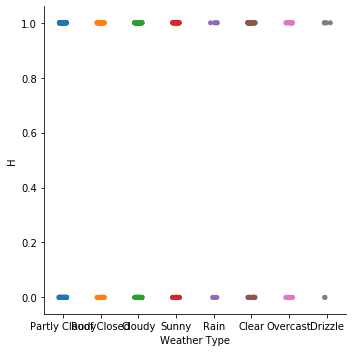

In [62]:
sns.catplot(x = 'Weather Type', y = 'H', data = merge)

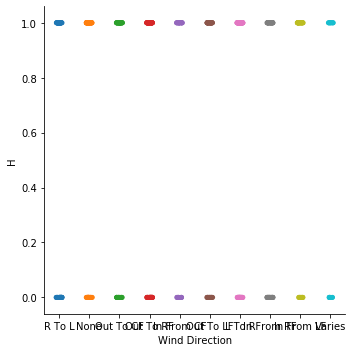

In [61]:
sns.catplot(x = 'Wind Direction', y = 'H', data = merge)

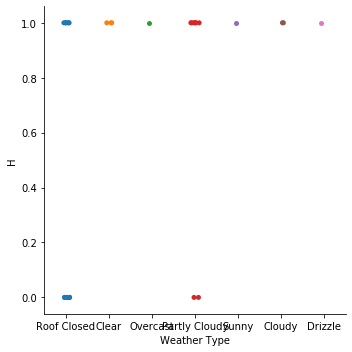

In [64]:
sns.catplot(x = 'Weather Type', y = 'H', data = test)

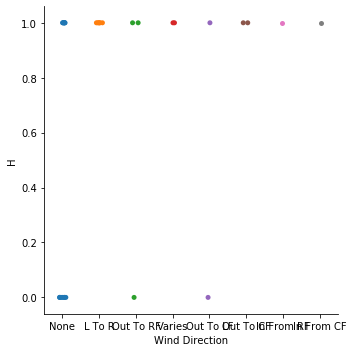

In [63]:
sns.catplot(x = 'Wind Direction', y = 'H', data = test)